In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 

## Explatory Data Analysis

In [3]:
df = pd.read_csv('heart_disease.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<Axes: >

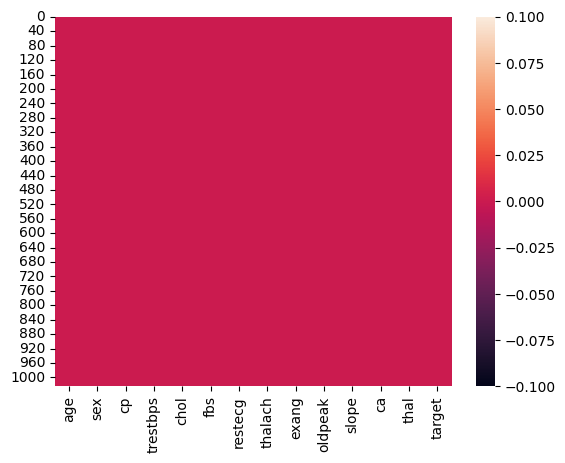

In [8]:
sns.heatmap(df.isnull())

<Axes: >

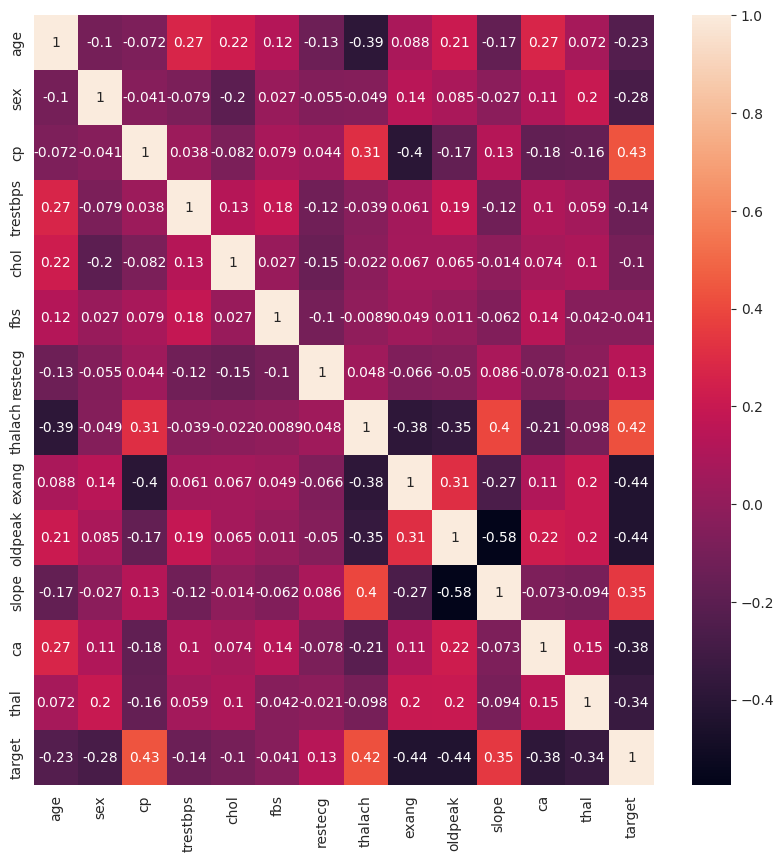

In [9]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='target', ylabel='thalach'>

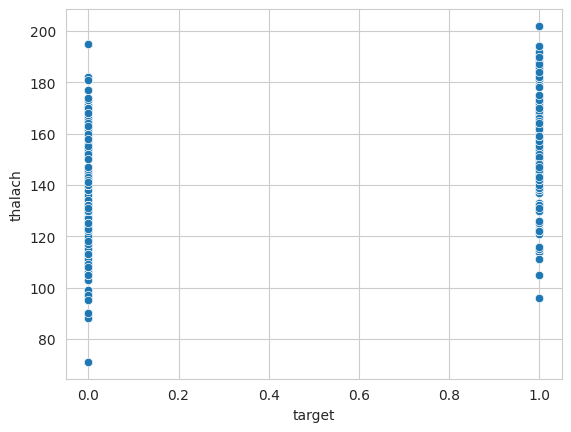

In [10]:
#df.columns
sns.scatterplot(x='target',y='thalach',data=df)

Text(0, 0.5, 'Frequency')

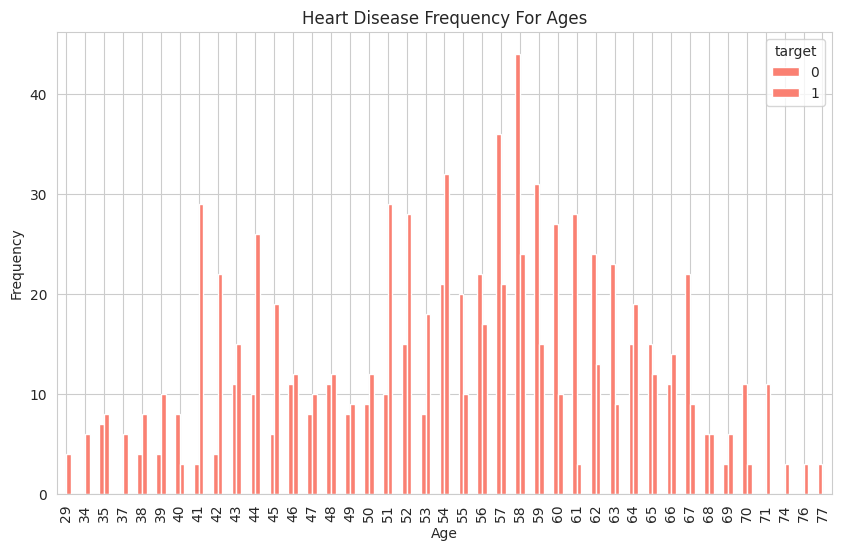

In [11]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(10,6),color="salmon")
plt.title('Heart Disease Frequency For Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')


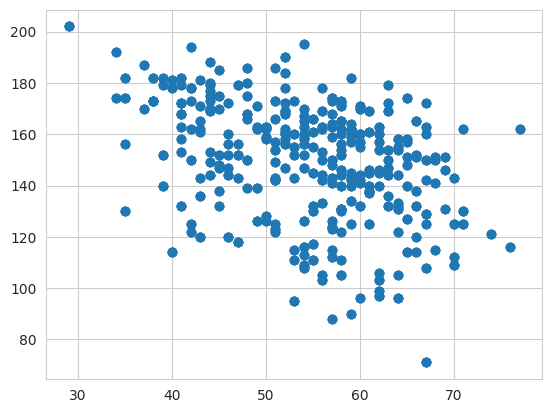

In [12]:
plt.scatter(x='age',y='thalach',data=df)

### Machine Learning Section

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('target',axis=1).values

In [15]:
y = df['target'].values

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 88)

In [17]:
y_train.shape

(717,)

In [18]:
X_train.shape

(717, 13)

In [19]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train, y_train)

/home/omo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
predictions = model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.72      0.79       152
           1       0.77      0.91      0.83       156

    accuracy                           0.81       308
   macro avg       0.83      0.81      0.81       308
weighted avg       0.83      0.81      0.81       308



In [26]:
print(confusion_matrix(y_test,predictions))

[[109  43]
 [ 14 142]]
